## Cleaning and analyzing datasets

Previously, I scraped `.xlsx` files from the New York Police Department's page on [Hate Crimes Reports](https://www.nyc.gov/site/nypd/stats/reports-analysis/hate-crimes.page). This time, I will be cleaning and analyzing the datasets downloaded.

_(Note: I manually created a new folder to organize the files that were downloaded and I previewed the datasets to figure out which ones I wanted to use.)_

#### Hate crime complaints by motivation

The datasets cover 2020-2023 by quarter and by year, and only the first quarter for 2024. I've decided to use the quarterly breakdowns to hopefully see nuances in the data, e.g., a possible spike in anti-Asian sentiments at the onset of Covid-19 and in anti-Jewish sentiments during the Israel-Palestine war.

In [154]:
# Start by setting up libraries

import pandas as pd
import numpy
import matplotlib.pyplot as plt

#### Q1, 2020

Observed issues: The dataset has four rows that contain text as title and description of the dataset. I used `skiprows` to remove these unnecessary rows.

In [2]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q1-202020.xlsx', skiprows=4)
df.dtypes

Precinct                                 object
Anti-Asian                              float64
Anti-Black                              float64
Anti-Catholic                           float64
Anti-Female Homosexual (Lesbian)        float64
Anti-Hindu                              float64
Anti-Islamic (Muslim)                   float64
Anti-Jewish                             float64
Anti-Male Homosexual (Gay)              float64
Anti-Other Ethnicity/National Origin    float64
Anti-Transgender                        float64
Anti-White                              float64
Total                                   float64
dtype: object

In [3]:
# Get only the totals, which are in the last row

last_row = df.tail(1)

In [4]:
# Create a new DF for totals

totals_df = pd.DataFrame(last_row)
totals_df['period'] = '2020, Q1'

In [5]:
# This makes reindexing of later DFs easier...

totals_df.columns = totals_df.columns.str.lower().str.strip()

In [6]:
# Renaming columns for consistency... 

totals_df = totals_df.rename(columns={'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-islamic (muslim)': 'anti-muslim', 'anti-other ethnicity/national origin': 'anti-other ethnicity'})

In [7]:
# totals_df.drop(['precinct'], axis=1)
# totals_df.drop(totals_df.columns[0], axis=1)

In [8]:
# Save as CSV for checkpoint

totals_df.to_csv('totals.csv')

#### Q2, 2020

Observed issues: The column names are capitalized and not in the same order as those of `Q1, 2020`. Some column names also do not exist or are stated differently than that of the previous dataset, so I had to `rename` some columns in this dataset and the previous one. 

Aside from the first four rows to skip, the **totals** in this dataset are also not in the last row, so I cannot simply use `.tail(1)`.

In [9]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q2-202020.xlsx', skiprows=4)
df.dtypes

PRECINCT                              object
60 YEARS OLD OR MORE                 float64
ANTI-ARAB                            float64
ANTI-ASIAN                           float64
ANTI-BLACK                           float64
ANTI-CATHOLIC                        float64
ANTI-FEMALE                          float64
ANTI-FEMALE HOMOSEXUAL\n(LESBIAN)    float64
ANTI-GENDER NON-CONFORMING           float64
ANTI-HINDU                           float64
ANTI-HISPANIC                        float64
ANTI-ISLAMIC\n(MUSLIM)               float64
ANTI-JEWISH                          float64
ANTI-MALE HOMOSEXUAL\n(GAY)          float64
ANTI-OTHER ETHNICITY                 float64
ANTI-TRANSGENDER                     float64
ANTI-WHITE                           float64
Total                                float64
dtype: object

In [10]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [11]:
# Drop unnecessary rows

df.drop(df.tail(4).index, inplace=True)

In [12]:
# Get only the totals, which are NOW the last row

last_row = df.tail(1)

In [13]:
last_row['period'] = '2020, Q2'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/2065008592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2020, Q2'


In [14]:
# Renaming columns for consistency... 

last_row = last_row.rename(columns={'anti-female homosexual(lesbian)': 'anti-lesbian', 'anti-male homosexual(gay)': 'anti-gay', 'anti-islamic(muslim)': 'anti-muslim'})

In [15]:
# Check and align columns

common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-hindu', 'anti-muslim', 'anti-jewish', 'anti-gay',
       'anti-other ethnicity', 'anti-transgender', 'anti-white', 'total',
       'period'],
      dtype='object')

In [16]:
# Check different columns

diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['60 years old or more', 'anti-arab', 'anti-female',
       'anti-gender non-conforming', 'anti-hispanic'],
      dtype='object')

In [17]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,anti-transgender,anti-white,total,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,2.0,2.0,84.0,"2020, Q1",NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,1.0,2.0,46.0,"2020, Q2",1.0,1.0,0.0,2.0,0.0


#### Q3, 2020

In [18]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q3-2020.xlsx', skiprows=4)
df.dtypes

PRECINCT                             object
ANTI-ASIAN                            int64
ANTI-BLACK                            int64
ANTI-CATHOLIC                         int64
ANTI-JEWISH                           int64
ANTI-LGBT (MIXED GROUP)               int64
ANTI-MALE HOMOSEXUAL (GAY)            int64
ANTI-MULTI RACIAL GROUPS              int64
ANTI-OTHER ETHNICITY                  int64
ANTI-RELIGIOUS PRACTICE GENERALLY     int64
ANTI-TRANSGENDER                      int64
ANTI-WHITE                            int64
Total                                 int64
dtype: object

In [19]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [20]:
last_row = df.tail(1)
last_row['period'] = '2020, Q3'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/4190589498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2020, Q3'


In [21]:
last_row = last_row.rename(columns={'anti-lgbt (mixed group)': 'anti-lgbt', 'anti-male homosexual (gay)': 'anti-gay', 'anti-islamic(muslim)': 'anti-muslim'})

In [22]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-jewish',
       'anti-gay', 'anti-other ethnicity', 'anti-transgender', 'anti-white',
       'total', 'period'],
      dtype='object')

In [23]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['anti-lgbt', 'anti-multi racial groups',
       'anti-religious practice generally'],
      dtype='object')

In [24]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,total,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,84.0,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,46.0,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,75.0,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0


#### Q4, 2020

In [25]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q4-2020.xlsx', skiprows=4)
df.dtypes

PRECINCT                             object
ANTI-ASIAN                            int64
ANTI-BLACK                            int64
ANTI-CATHOLIC                         int64
ANTI-FEMALE                           int64
ANTI-FEMALE HOMOSEXUAL\n(LESBIAN)     int64
ANTI-HISPANIC                         int64
ANTI-ISLAMIC\n(MUSLIM)                int64
ANTI-JEWISH                           int64
ANTI-MALE HOMOSEXUAL\n(GAY)           int64
ANTI-OTHER ETHNICITY                  int64
ANTI-WHITE                            int64
Total                                 int64
dtype: object

In [26]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [27]:
last_row = df.tail(1)
last_row['period'] = '2020, Q4'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/1596762532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2020, Q4'


In [28]:
last_row = last_row.rename(columns={'anti-female homosexual(lesbian)': 'anti-lesbian', 'anti-male homosexual(gay)': 'anti-gay', 'anti-islamic(muslim)': 'anti-muslim'})

In [29]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-white', 'total', 'period', 'anti-female', 'anti-hispanic'],
      dtype='object')

In [30]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [31]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,total,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,84.0,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,46.0,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,75.0,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,60.0,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN


#### Q1, 2021

Observed issue: The filename of the dataset was misspelled, i.e. "motiviation"

In [32]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motiviation-q1-2021.xlsx', skiprows=4)
df.dtypes

PRECINCT                            object
ANTI-ASIAN                           int64
ANTI-BLACK                           int64
ANTI-FEMALE                          int64
ANTI-FEMALE HOMOSEXUAL (LESBIAN)     int64
ANTI-HISPANIC                        int64
ANTI-JEWISH                          int64
ANTI-LGBT (MIXED GROUP)              int64
ANTI-MALE HOMOSEXUAL (GAY)           int64
ANTI-MUSLIM                          int64
ANTI-OTHER ETHNICITY                 int64
ANTI-TRANSGENDER                     int64
Grand Total                          int64
dtype: object

In [33]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [34]:
last_row = df.tail(1)
last_row['period'] = '2021, Q1'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/3486932570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2021, Q1'


In [35]:
last_row = last_row.rename(columns={'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [36]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-lesbian', 'anti-muslim',
       'anti-jewish', 'anti-gay', 'anti-other ethnicity', 'anti-transgender',
       'period', 'anti-female', 'anti-hispanic', 'anti-lgbt'],
      dtype='object')

In [37]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['grand total'], dtype='object')

In [38]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,"2021, Q1",NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0


#### Q2, 2021

Observed issue: Only one column name was different from that of the previous datasets.

In [39]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q2-2021.xlsx', skiprows=4)
df.dtypes

PRECINCT                            object
ANTI-ASIAN                           int64
ANTI-WHITE                           int64
ANTI-CATHOLIC                        int64
ANTI-BLACK                           int64
ANTI-FEMALE                          int64
ANTI-GENDER NON CONFORMING           int64
ANTI-FEMALE HOMOSEXUAL (LESBIAN)     int64
ANTI-HISPANIC                        int64
ANTI-JEWISH                          int64
ANTI-LGBT (MIXED GROUP)              int64
ANTI-MALE HOMOSEXUAL (GAY)           int64
ANTI-MUSLIM                          int64
ANTI-OTHER ETHNICITY                 int64
ANTI-TRANSGENDER                     int64
Grand Total                          int64
dtype: object

In [40]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [41]:
last_row = df.tail(1)
last_row['period'] = '2021, Q2'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/767617593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2021, Q2'


In [42]:
last_row = last_row.rename(columns={'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [43]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-transgender', 'anti-white', 'period', 'anti-female',
       'anti-gender non-conforming', 'anti-hispanic', 'anti-lgbt',
       'grand total'],
      dtype='object')

In [44]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [45]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,"2021, Q1",NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,"2021, Q2",NaN,NaN,0.0,2.0,2.0,1.0,NaN,NaN,226.0


#### Q3, 2021

In [46]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q3-2021.xlsx', skiprows=4)
df.dtypes

PRECINCT                            object
ANTI-ASIAN                           int64
ANTI-WHITE                           int64
ANTI-ARAB                            int64
ANTI-CATHOLIC                        int64
ANTI-BLACK                           int64
ANTI-FEMALE                          int64
ANTI-GENDER NON CONFORMING           int64
ANTI-FEMALE HOMOSEXUAL (LESBIAN)     int64
ANTI-HISPANIC                        int64
ANTI-JEWISH                          int64
ANTI-LGBT (MIXED GROUP)              int64
ANTI-MALE HOMOSEXUAL (GAY)           int64
ANTI-MUSLIM                          int64
ANTI-OTHER ETHNICITY                 int64
ANTI-TRANSGENDER                     int64
Grand Total                          int64
dtype: object

In [47]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [48]:
last_row = df.tail(1)
last_row['period'] = '2021, Q3'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/2826556745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2021, Q3'


In [49]:
last_row = last_row.rename(columns={'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [50]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-transgender', 'anti-white', 'period', 'anti-arab', 'anti-female',
       'anti-gender non-conforming', 'anti-hispanic', 'anti-lgbt',
       'grand total'],
      dtype='object')

In [51]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [52]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,"2021, Q1",NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,"2021, Q2",NaN,NaN,0.0,2.0,2.0,1.0,NaN,NaN,226.0
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,"2021, Q3",NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,114.0


#### Q4, 2021

In [53]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q4-2021.xlsx', skiprows=4)
df.dtypes

PRECINCT                            object
ANTI-ASIAN                           int64
ANTI-WHITE                           int64
ANTI-ARAB                            int64
ANTI-CATHOLIC                        int64
ANTI-BLACK                           int64
ANTI-FEMALE                          int64
ANTI-GENDER NON CONFORMING           int64
ANTI-FEMALE HOMOSEXUAL (LESBIAN)     int64
ANTI-HISPANIC                        int64
ANTI-JEWISH                          int64
ANTI-LGBT (MIXED GROUP)              int64
ANTI-MALE HOMOSEXUAL (GAY)           int64
ANTI-MUSLIM                          int64
ANTI-OTHER ETHNICITY                 int64
ANTI-TRANSGENDER                     int64
Grand Total                          int64
dtype: object

In [54]:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace('\n', '')

In [55]:
last_row = df.tail(1)
last_row['period'] = '2021, Q4'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/3900099325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2021, Q4'


In [56]:
last_row = last_row.rename(columns={'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [57]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-transgender', 'anti-white', 'period', 'anti-arab', 'anti-female',
       'anti-gender non-conforming', 'anti-hispanic', 'anti-lgbt',
       'grand total'],
      dtype='object')

In [58]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [59]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,"2021, Q1",NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,"2021, Q2",NaN,NaN,0.0,2.0,2.0,1.0,NaN,NaN,226.0
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,"2021, Q3",NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,114.0
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,"2021, Q4",NaN,0.0,0.0,0.0,2.0,0.0,NaN,NaN,112.0


In [60]:
# Save as CSV for checkpoint

totals_df.to_csv('totals.csv')

### Using `def` to shorten repetitive tasks

At this point, I will try setting a new function through `def` to hopefully make the routine easier.

In [61]:
def clean(df):
    df.columns = df.columns.str.lower().str.strip()
    df.columns = df.columns.str.replace('\n', '')

In [62]:
# This did not work...

def merge_totals(df):
    totals_df = pd.concat([totals_df, last_row], ignore_index=True)

In [63]:
# This also did not work...

def common(df):
    df = df.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

#### Q1, 2022

In [64]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q1-2022.xlsx', skiprows=4)
df.dtypes

PRECINCT                            object
ANTI-ASIAN                           int64
ANTI-BLACK                           int64
ANTI-CATHOLIC                        int64
ANTI-FEMALE HOMOSEXUAL (LESBIAN)     int64
ANTI-HISPANIC                        int64
ANTI-JEWISH                          int64
ANTI-MALE HOMOSEXUAL (GAY)           int64
ANTI-MUSLIM                          int64
ANTI-OTHER ETHNICITY                 int64
ANTI-OTHER RELIGION                  int64
ANTI-TRANSGENDER                     int64
ANTI-WHITE                           int64
Grand Total                          int64
dtype: object

In [65]:
clean(df)

In [66]:
df

,precinct,anti-asian,anti-black,anti-catholic,anti-female homosexual (lesbian),anti-hispanic,anti-jewish,anti-male homosexual (gay),anti-muslim,anti-other ethnicity,anti-other religion,anti-transgender,anti-white,grand total
0,001,0,2,0,0,0,5,0,0,0,0,0,0,7
1,005,1,0,0,0,0,1,0,0,0,0,0,1,3
2,006,0,0,0,0,0,0,0,0,0,0,0,0,0
3,007,2,1,0,0,0,2,0,0,0,0,0,0,5
4,009,2,0,0,0,0,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,120,0,0,0,0,0,0,0,0,0,0,0,0,0
74,121,0,1,0,0,0,0,0,0,0,0,0,0,1
75,122,0,1,0,0,0,0,0,0,0,0,0,0,1
76,123,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# I can't `def` the following because the 'period' column has to be specified.

last_row = df.tail(1)
last_row['period'] = '2022, Q1'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/2695052722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2022, Q1'


In [68]:
last_row = last_row.rename(columns={'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [69]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally'})

In [70]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-transgender', 'anti-white', 'period', 'anti-hispanic',
       'anti-religious practice generally', 'grand total'],
      dtype='object')

In [71]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [72]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)

In [73]:
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,period,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,"2020, Q1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,"2020, Q2",1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,"2020, Q3",NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,"2020, Q4",NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,"2021, Q1",NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,"2021, Q2",NaN,NaN,0.0,2.0,2.0,1.0,NaN,NaN,226.0
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,"2021, Q3",NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,114.0
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,"2021, Q4",NaN,0.0,0.0,0.0,2.0,0.0,NaN,NaN,112.0
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,"2022, Q1",NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,142.0


#### Q2, 2022

In [74]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q2-2022.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                      object
anti-asian                     int64
anti-black                     int64
anti-catholic                  int64
anti-hispanic                  int64
anti-male homosexual (gay)     int64
anti-muslim                    int64
anti-other ethnicity           int64
anti-jewish                    int64
anti-sikh                      int64
anti-other religion            int64
anti-transgender               int64
anti-white                     int64
grand total                    int64
dtype: object

In [75]:
last_row = df.tail(1)
last_row['period'] = '2022, Q2'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/464266979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2022, Q2'


In [76]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [77]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-muslim',
       'anti-jewish', 'anti-gay', 'anti-other ethnicity', 'anti-transgender',
       'anti-white', 'period', 'anti-hispanic',
       'anti-religious practice generally', 'grand total'],
      dtype='object')

In [78]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['anti-sikh'], dtype='object')

In [79]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,60 years old or more,anti-arab,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,1.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,96.0,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,NaN,NaN,0.0,2.0,2.0,1.0,NaN,NaN,226.0,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,114.0,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,NaN,0.0,0.0,0.0,2.0,0.0,NaN,NaN,112.0,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,142.0,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,0.0,155.0,2.0


#### Q3, 2022

Observed issue: The filename was misspelled.

In [80]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motiviation-q3-2022.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-eastern orthodox                int64
anti-female homosexual (lesbian)     int64
anti-hindu                           int64
anti-hispanic                        int64
anti-jehovahs witness                int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-other ethnicity                 int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [81]:
last_row = df.tail(1)
last_row['period'] = '2022, Q3'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/1564026510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2022, Q3'


In [82]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [83]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['anti-eastern orthodox', 'anti-jehovahs witness'], dtype='object')

In [84]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-lesbian', 'anti-hindu',
       'anti-jewish', 'anti-gay', 'anti-other ethnicity', 'anti-transgender',
       'anti-white', 'period', 'anti-hispanic', 'grand total'],
      dtype='object')

In [85]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,anti-female,anti-gender non-conforming,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh,anti-eastern orthodox,anti-jehovahs witness
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,3.0,NaN,1.0,1.0,NaN,NaN,96.0,NaN,NaN,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,0.0,2.0,2.0,1.0,NaN,NaN,226.0,NaN,NaN,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,0.0,1.0,1.0,0.0,NaN,NaN,114.0,NaN,NaN,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,0.0,0.0,2.0,0.0,NaN,NaN,112.0,NaN,NaN,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,NaN,NaN,2.0,NaN,NaN,2.0,142.0,NaN,NaN,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,NaN,NaN,6.0,NaN,NaN,0.0,155.0,2.0,NaN,NaN


#### Q4, 2022

In [86]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q4-2022.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                             object
anti-asian                            int64
anti-black                            int64
anti-buddhist                         int64
anti-catholic                         int64
anti-female homosexual (lesbian)      int64
anti-hispanic                         int64
anti-jewish                           int64
anti-male homosexual (gay)            int64
anti-other ethnicity                  int64
anti-protestant                       int64
anti-religious practice generally     int64
anti-transgender                      int64
anti-white                            int64
grand total                           int64
dtype: object

In [87]:
last_row = df.tail(1)
last_row['period'] = '2022, Q4'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/3543889445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2022, Q4'


In [88]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [89]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-jewish', 'anti-gay', 'anti-other ethnicity', 'anti-transgender',
       'anti-white', 'period', 'anti-hispanic',
       'anti-religious practice generally', 'grand total'],
      dtype='object')

In [90]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index(['anti-buddhist', 'anti-protestant'], dtype='object')

In [91]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh,anti-eastern orthodox,anti-jehovahs witness,anti-buddhist,anti-protestant
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,1.0,1.0,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,2.0,1.0,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,1.0,0.0,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,2.0,0.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,2.0,NaN,NaN,2.0,142.0,NaN,NaN,NaN,NaN,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,6.0,NaN,NaN,0.0,155.0,2.0,NaN,NaN,NaN,NaN


#### Q1, 2023

In [92]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q1-2023.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-catholic                        int64
anti-female homosexual (lesbian)     int64
anti-gender non conforming           int64
anti-hispanic                        int64
anti-jehovahs witness                int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-muslim                          int64
anti-other ethnicity                 int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [93]:
last_row = df.tail(1)
last_row['period'] = '2023, Q1'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/493172275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2023, Q1'


In [94]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [95]:
common_columns = totals_df.columns.intersection(last_row.columns)
common_columns

Index(['precinct', 'anti-asian', 'anti-black', 'anti-catholic', 'anti-lesbian',
       'anti-muslim', 'anti-jewish', 'anti-gay', 'anti-other ethnicity',
       'anti-transgender', 'anti-white', 'period',
       'anti-gender non-conforming', 'anti-hispanic', 'grand total',
       'anti-jehovahs witness'],
      dtype='object')

In [96]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [97]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh,anti-eastern orthodox,anti-jehovahs witness,anti-buddhist,anti-protestant
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,1.0,1.0,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,2.0,1.0,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,1.0,0.0,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,2.0,0.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,2.0,NaN,NaN,2.0,142.0,NaN,NaN,NaN,NaN,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,6.0,NaN,NaN,0.0,155.0,2.0,NaN,NaN,NaN,NaN


#### Q2, 2023

In [98]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q2-2023.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-catholic                        int64
anti-female homosexual (lesbian)     int64
anti-gender non conforming           int64
anti-hispanic                        int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-muslim                          int64
anti-other ethnicity                 int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [99]:
last_row = df.tail(1)
last_row['period'] = '2023, Q2'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/4265884935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2023, Q2'


In [100]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [101]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [102]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh,anti-eastern orthodox,anti-jehovahs witness,anti-buddhist,anti-protestant
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,1.0,1.0,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,2.0,1.0,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,1.0,0.0,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,2.0,0.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,2.0,NaN,NaN,2.0,142.0,NaN,NaN,NaN,NaN,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,6.0,NaN,NaN,0.0,155.0,2.0,NaN,NaN,NaN,NaN


#### Q3, 2023

In [103]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q3-2023.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-catholic                        int64
anti-female homosexual (lesbian)     int64
anti-hispanic                        int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-muslim                          int64
anti-other ethnicity                 int64
anti-protestant                      int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [104]:
last_row = df.tail(1)
last_row['period'] = '2023, Q3'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/4244797752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2023, Q3'


In [106]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [107]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [108]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df

,precinct,anti-asian,anti-black,anti-catholic,anti-lesbian,anti-hindu,anti-muslim,anti-jewish,anti-gay,anti-other ethnicity,...,anti-hispanic,anti-lgbt,anti-multi racial groups,anti-religious practice generally,grand total,anti-sikh,anti-eastern orthodox,anti-jehovahs witness,anti-buddhist,anti-protestant
0,Total,11.0,12.0,1.0,1.0,1.0,1.0,45.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,8.0,5.0,3.0,2.0,1.0,0.0,15.0,4.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,4.0,16.0,3.0,NaN,NaN,NaN,28.0,8.0,1.0,...,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,3.0,8.0,1.0,1.0,NaN,3.0,28.0,8.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Total,42.0,12.0,NaN,1.0,NaN,1.0,27.0,4.0,2.0,...,1.0,1.0,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN
5,Grand Total,63.0,17.0,4.0,0.0,NaN,5.0,85.0,29.0,2.0,...,2.0,1.0,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN
6,Grand Total,20.0,7.0,4.0,2.0,NaN,4.0,38.0,27.0,3.0,...,1.0,0.0,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
7,Grand Total,13.0,9.0,1.0,1.0,NaN,2.0,57.0,13.0,3.0,...,2.0,0.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN
8,Grand Total,17.0,20.0,3.0,1.0,NaN,3.0,67.0,15.0,7.0,...,2.0,NaN,NaN,2.0,142.0,NaN,NaN,NaN,NaN,NaN
9,Grand Total,20.0,11.0,3.0,NaN,NaN,14.0,64.0,24.0,9.0,...,6.0,NaN,NaN,0.0,155.0,2.0,NaN,NaN,NaN,NaN


#### Q4, 2023

In [110]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q4-2023.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-buddhist                        int64
anti-catholic                        int64
anti-female homosexual (lesbian)     int64
anti-gender non conforming           int64
anti-hispanic                        int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-muslim                          int64
anti-other ethnicity                 int64
anti-sikh                            int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [112]:
last_row = df.tail(1)
last_row['period'] = '2023, Q4'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/2130269765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2023, Q4'


In [113]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [114]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [116]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df['period']

0     2020, Q1
1     2020, Q2
2     2020, Q3
3     2020, Q4
4     2021, Q1
5     2021, Q2
6     2021, Q3
7     2021, Q4
8     2022, Q1
9     2022, Q2
10    2022, Q3
11    2022, Q4
12    2023, Q1
13    2023, Q2
14    2023, Q3
15    2023, Q4
16    2023, Q4
Name: period, dtype: object

#### Q1, 2024

Finally, we're here!

In [119]:
df = pd.read_excel('downloaded-datasets/hate-crime-complaints-by-motivation-q1-2024.xlsx', skiprows=4)
clean(df)
df.dtypes

precinct                            object
anti-asian                           int64
anti-black                           int64
anti-buddhist                        int64
anti-catholic                        int64
anti-female homosexual (lesbian)     int64
anti-gender non conforming           int64
anti-hispanic                        int64
anti-jewish                          int64
anti-male homosexual (gay)           int64
anti-muslim                          int64
anti-other ethnicity                 int64
anti-protestant                      int64
anti-sikh                            int64
anti-transgender                     int64
anti-white                           int64
grand total                          int64
dtype: object

In [121]:
last_row = df.tail(1)
last_row['period'] = '2024, Q1'

/var/folders/4f/fk_hbgy14cg47tw521m3y0xw0000gn/T/ipykernel_53623/704503961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row['period'] = '2024, Q1'


In [122]:
last_row = last_row.rename(columns={'anti-other religion': 'anti-religious practice generally', 'anti-gender non conforming': 'anti-gender non-conforming', 'anti-female homosexual (lesbian)': 'anti-lesbian', 'anti-male homosexual (gay)': 'anti-gay', 'anti-lgbt (mixed group)': 'anti-lgbt'})

In [123]:
diff_columns1 = last_row.columns.difference(totals_df.columns)
diff_columns1

Index([], dtype='object')

In [124]:
totals_df = pd.concat([totals_df, last_row], ignore_index=True)
totals_df['period']

0     2020, Q1
1     2020, Q2
2     2020, Q3
3     2020, Q4
4     2021, Q1
5     2021, Q2
6     2021, Q3
7     2021, Q4
8     2022, Q1
9     2022, Q2
10    2022, Q3
11    2022, Q4
12    2023, Q1
13    2023, Q2
14    2023, Q3
15    2023, Q4
16    2024, Q1
Name: period, dtype: object

In [137]:
# Final checkpoint!

totals_df.to_csv('totals.csv')

## Now, the magic happens! ✨

***Sort of...*** First, I'll check if my columns are in order.

In [129]:
# Removing the 'precinct' column, which was totally unnecessary...

totals_df.drop(columns=['precinct'], inplace=True)

In [140]:
# Note: This shows totals per quarter.

totals_df['total'].combine_first(totals_df['grand total'])

0      84.0
1      46.0
2      75.0
3      60.0
4      96.0
5     226.0
6     114.0
7     112.0
8     142.0
9     155.0
10    131.0
11    107.0
12    111.0
13    120.0
14    106.0
15    257.0
16    136.0
Name: total, dtype: float64

In [143]:
totals_df.drop(columns=['grand total'], inplace=True)

## Magic 2.0! ✨

Not yet, but we're getting there. The `total` column shows the total number of hate crime complaints reported per quarter. I also want to check the total number of hate crime complaints per "bias motivation".

Then, I can do all the data analyses and viz that I want. Probably.

In [150]:
# Sum per column

totals_df.loc['Total',:] = totals_df.sum(axis=0)

In [152]:
# CHECKPOINT

totals_df.to_csv('totals.csv')

## The fun part! And, magic! I guess. ✨

array([[<Axes: title={'center': 'anti-asian'}>,
        <Axes: title={'center': 'anti-black'}>,
        <Axes: title={'center': 'anti-catholic'}>,
        <Axes: title={'center': 'anti-lesbian'}>,
        <Axes: title={'center': 'anti-hindu'}>],
       [<Axes: title={'center': 'anti-muslim'}>,
        <Axes: title={'center': 'anti-jewish'}>,
        <Axes: title={'center': 'anti-gay'}>,
        <Axes: title={'center': 'anti-other ethnicity'}>,
        <Axes: title={'center': 'anti-transgender'}>],
       [<Axes: title={'center': 'anti-white'}>,
        <Axes: title={'center': 'total'}>,
        <Axes: title={'center': '60 years old or more'}>,
        <Axes: title={'center': 'anti-arab'}>,
        <Axes: title={'center': 'anti-female'}>],
       [<Axes: title={'center': 'anti-gender non-conforming'}>,
        <Axes: title={'center': 'anti-hispanic'}>,
        <Axes: title={'center': 'anti-lgbt'}>,
        <Axes: title={'center': 'anti-multi racial groups'}>,
        <Axes: title={'cent

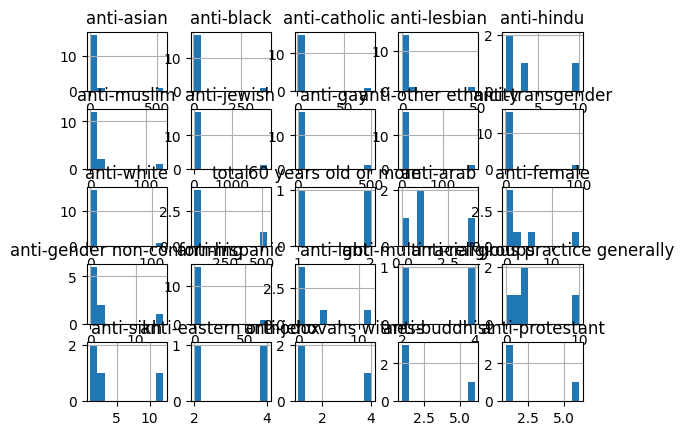

In [163]:
totals_df.sort_values('total').hist()